## Google Colab Notebook to create dataframe from DMOZ data

Requirement: download 'content.rdf.u8' with Wayback Machine from DMOZ's website and store it in your Google Drive

Author: Lisa Hoek

In [ ]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
# Give permission to Google drive
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# Make sure the content.rdf.u8 file is in your google drive. The ID is part of the link to the file (click on retrieve link)
id = "INSERT_ID_HERE"
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('content.rdf.u8')

In [ ]:
import re
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.DataFrame(columns=['maincategory','categories', 'url', 'title'])

with open('content.rdf.u8', 'r') as contents:
    lines = contents.read().split("</ExternalPage>")

In [ ]:
topics_mainlist = []
topics_list = []
titles_list = []
urls_list = []

lines = [str(line) for line in lines]
for line in lines:
  titles = re.findall('<d:Title>(.+)</d:Title>', line)
  urls = re.findall('<ExternalPage about="(.+)">', line)
  topics = re.findall('<topic>(.+)</topic>', line)
  if titles and urls and topics:
    topics_mainlist.append(topics[0].split('/')[1])
    topics_list.append(topics[0])
    titles_list.append(titles[0])
    urls_list.append(urls[0])


In [ ]:
del lines
del titles
del urls
del topics

In [ ]:
print(topics_mainlist[0])
print(topics_list[0])
print(titles_list[0])
print(urls_list[0])

Arts
Top/Arts/Animation
Animation World Network
http://www.awn.com/


In [ ]:
df.maincategory = topics_mainlist
df.categories = topics_list
df.url = urls_list
df.title = titles_list

In [ ]:
df.head()

,maincategory,categories,url,title
0,Arts,Top/Arts/Animation,http://www.awn.com/,Animation World Network
1,Arts,Top/Arts/Animation,http://animation.about.com/,About.com: Animation Guide
2,Arts,Top/Arts/Animation,http://www.toonhound.com/,Toonhound
3,Arts,Top/Arts/Animation,http://www.digitalmediafx.com/Features/animati...,Digital Media FX: The History of Animation
4,Arts,Top/Arts/Animation,http://www.animated-divots.net/,Richard's Animated Divots


In [ ]:
df.tail()

,maincategory,categories,url,title
3573021,World,Top/World/Uyghurche/Salametlik,http://www.tebabat.cn/,Tébabet tor békiti
3573022,World,Top/World/Uyghurche/Xewer,http://www.xjtsnews.com/,Tengritagh uyghur tori
3573023,World,Top/World/Uyghurche/Xewer,http://www.rfa.org/,Erkin asiya radiosi
3573024,World,Top/World/Uyghurche/Xewer,http://www.uygurlar.org/,Uyghurlar tori
3573025,World,Top/World/Uyghurche/Xewer,http://www.istiqlaltv.com/,Istiqlal radio-tilivizisi


In [ ]:
# New shape
df.shape

(3573026, 4)

In [ ]:
# Utsav's Old shape (35259057, 4)
df.shape

(3529057, 4)

In [ ]:
df = df.drop(df[df.maincategory == 'World'].index)
df = df.drop(df[df.maincategory == 'Regional'].index)

In [ ]:
print("Shape without World and Regional")
df.shape

Shape without World and Regional


(1002735, 4)

In [ ]:
df.tail()

,maincategory,categories,url,title
1908198,Sports,Top/Sports/Youth_and_High_School,http://www.nays.org/,National Alliance For Youth Sports
1908199,Sports,Top/Sports/Youth_and_High_School,http://www.aod.org/being-catholic/catholic-you...,Detroit Catholic High School League
1908200,Sports,Top/Sports/Youth_and_High_School/News_and_Media,http://www.maxpreps.com/,MaxPreps.com
1908201,Sports,Top/Sports/Youth_and_High_School/News_and_Media,http://www.myscore.com/,My Score
1908202,Sports,Top/Sports/Youth_and_High_School/News_and_Media,http://www.usatodayhss.com/news/,USA Today: High School Sports


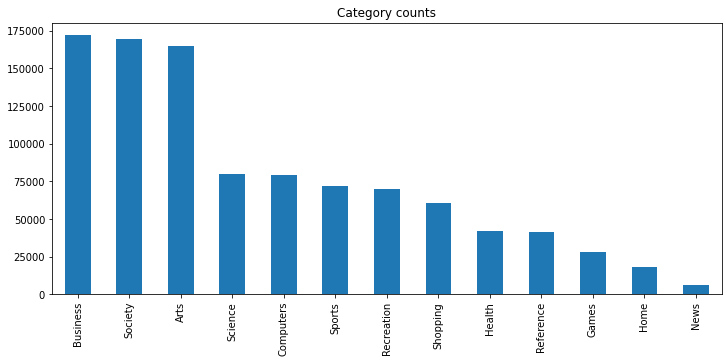

In [ ]:
plt.figure(figsize=(12, 5))
df.maincategory.value_counts().plot(kind='bar');
plt.title('Category counts');

In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
df.to_csv('urls.csv')
!cp urls.csv "drive/My Drive/"